In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")

🚫 Found 171 invalid spots (outside tissue) in slide S_2
[(0, np.int64(1572), np.int64(1350)), (2, np.int64(1467), np.int64(526)), (12, np.int64(940), np.int64(1624)), (47, np.int64(1309), np.int64(1624)), (62, np.int64(1441), np.int64(480)), (79, np.int64(533), np.int64(1692)), (96, np.int64(862), np.int64(1624)), (112, np.int64(1730), np.int64(1167)), (135, np.int64(1506), np.int64(1647)), (155, np.int64(454), np.int64(1692)), (157, np.int64(1690), np.int64(1144)), (193, np.int64(1111), np.int64(1601)), (197, np.int64(1624), np.int64(1212)), (203, np.int64(1717), np.int64(1144)), (204, np.int64(1704), np.int64(984)), (205, np.int64(428), np.int64(1692)), (208, np.int64(677), np.int64(1669)), (216, np.int64(848), np.int64(1647)), (225, np.int64(1217), np.int64(1601)), (245, np.int64(520), np.int64(1669)), (249, np.int64(612), np.int64(1646)), (292, np.int64(822), np.int64(1647)), (298, np.int64(1559), np.int64(1373)), (299, np.int64(1624), np.int64(1304)), (324, np.int64(572), np.int64

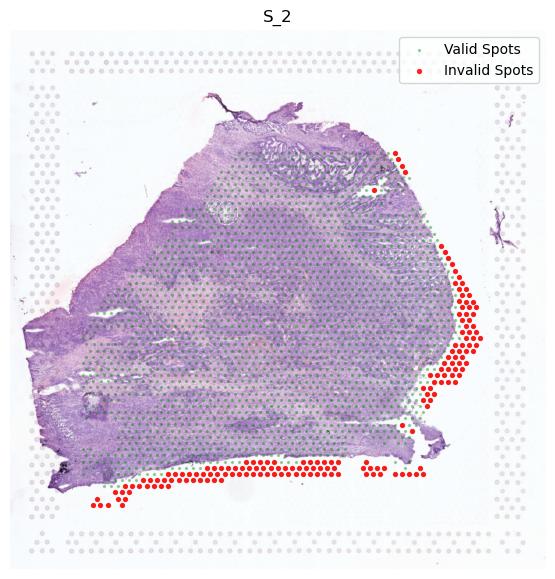

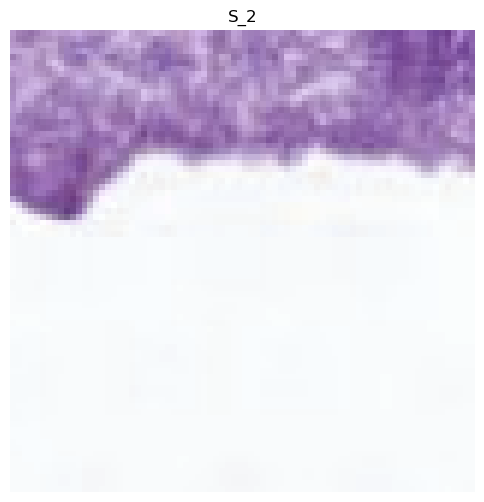

In [4]:
from scripts.find_invalid_spot import generate_tissue_mask, detect_invalid_spots_and_plot, extract_tile

import h5py

with h5py.File("dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_2'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    print(detect_invalid_spots_and_plot(image, x, y, tile_size=26, title=sample))
    
    plt.figure(figsize=(6,6))
    plt.imshow(extract_tile(image, 324, 1701, tile_size=78), aspect="auto")
    #plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

🚫 Found 84 invalid spots (outside tissue) in slide S_1 - RAW
🚫 Found 171 invalid spots (outside tissue) in slide S_2 - RAW
🚫 Found 2 invalid spots (outside tissue) in slide S_3 - RAW
🚫 Found 0 invalid spots (outside tissue) in slide S_4 - RAW
🚫 Found 0 invalid spots (outside tissue) in slide S_5 - RAW
🚫 Found 1 invalid spots (outside tissue) in slide S_6 - RAW


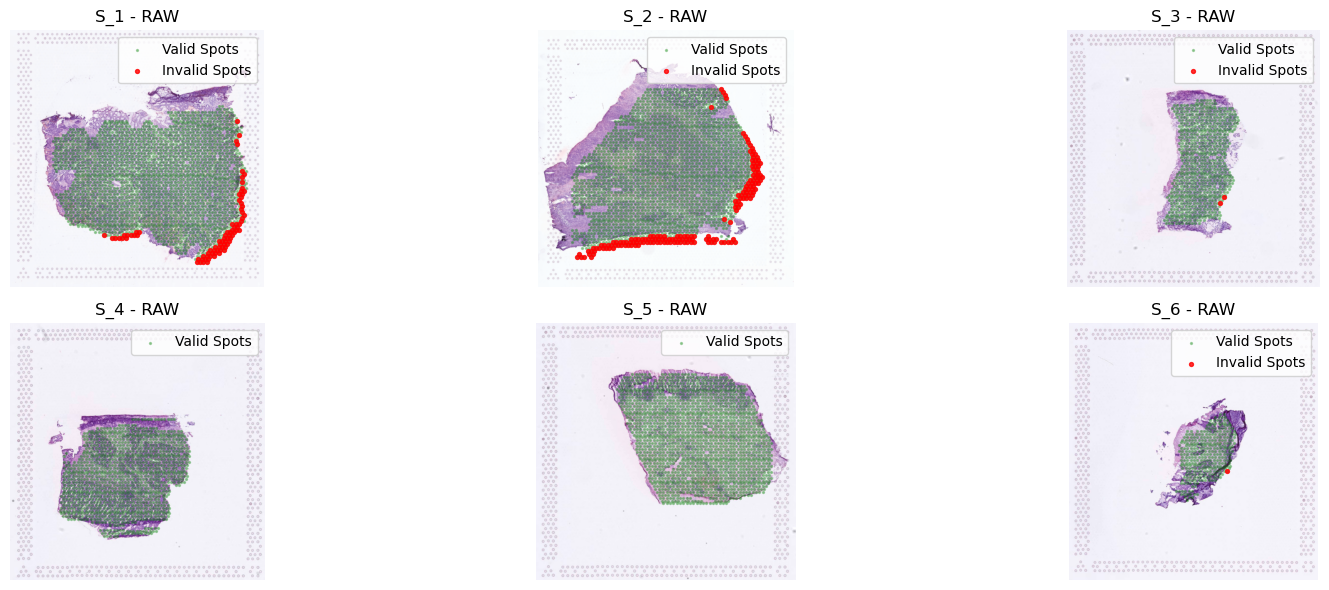

🚫 Found 0 invalid spots (outside tissue) in slide S_1 - realign
🚫 Found 1 invalid spots (outside tissue) in slide S_2 - realign
🚫 Found 0 invalid spots (outside tissue) in slide S_3 - realign
🚫 Found 0 invalid spots (outside tissue) in slide S_4 - realign
🚫 Found 0 invalid spots (outside tissue) in slide S_5 - realign
🚫 Found 0 invalid spots (outside tissue) in slide S_6 - realign


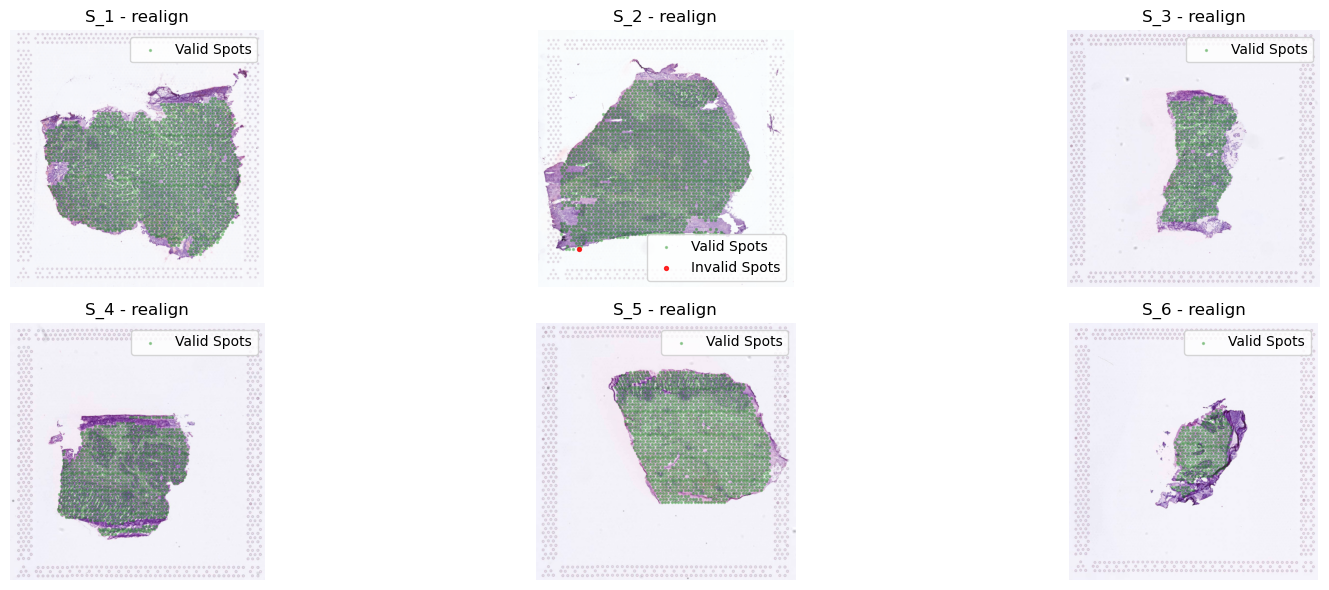

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

samples = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6']
invalid_spots_raw = {}
invalid_spots_masked = {}

def extract_tile(image, x, y, tile_size=56):
    half = tile_size // 2
    x1, x2 = x - half, x + half
    y1, y2 = y - half, y + half
    return image[y1:y2, x1:x2]

def get_invalid_spot_coords(invalid_list):
    return set((x, y) for _, x, y in invalid_list)

# 1️⃣ 執行 raw image 判斷
with h5py.File("dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    fig, axs = plt.subplots(2, 3, figsize=(18, 6))
    axs = axs.flatten()
    for i, sample in enumerate(samples):
        image = np.array(h5file["images/Train"][sample])
        spots = np.array(h5file["spots/Train"][sample])
        x_coords, y_coords = spots["x"], spots["y"]

        invalid = detect_invalid_spots_and_plot(image, x_coords, y_coords, ax=axs[i], title=f"{sample} - RAW", tile_size=26)
        invalid_spots_raw[sample] = invalid
    plt.tight_layout()
    plt.show()

# 2️⃣ 執行 realign image 判斷
with h5py.File("dataset/elucidata_ai_challenge_data.h5", "r") as masked_h5, \
     h5py.File("dataset/try2.h5", "r") as spot_h5:
    fig, axs = plt.subplots(2, 3, figsize=(18, 6))
    axs = axs.flatten()
    for i, sample in enumerate(samples):
        image = np.array(masked_h5[f"images/Train/{sample}"])
        spots = np.array(spot_h5[f"spots/Train/{sample}"])
        x_coords, y_coords = spots["x"], spots["y"]

        invalid = detect_invalid_spots_and_plot(image, x_coords, y_coords, ax=axs[i], title=f"{sample} - realign", tile_size=26)
        invalid_spots_masked[sample] = invalid
    plt.tight_layout()
    plt.show()

# Save removed spot.

🚫 Found 0 invalid spots (outside tissue) in slide S_1 - realign
Valid points save: 2197, Raw point: 2197
🚫 Found 1 invalid spots (outside tissue) in slide S_2 - realign
Valid points save: 2269, Raw point: 2270
🚫 Found 0 invalid spots (outside tissue) in slide S_3 - realign
Valid points save: 690, Raw point: 690
🚫 Found 0 invalid spots (outside tissue) in slide S_4 - realign
Valid points save: 1187, Raw point: 1187
🚫 Found 0 invalid spots (outside tissue) in slide S_5 - realign
Valid points save: 1677, Raw point: 1677
🚫 Found 0 invalid spots (outside tissue) in slide S_6 - realign
Valid points save: 328, Raw point: 328


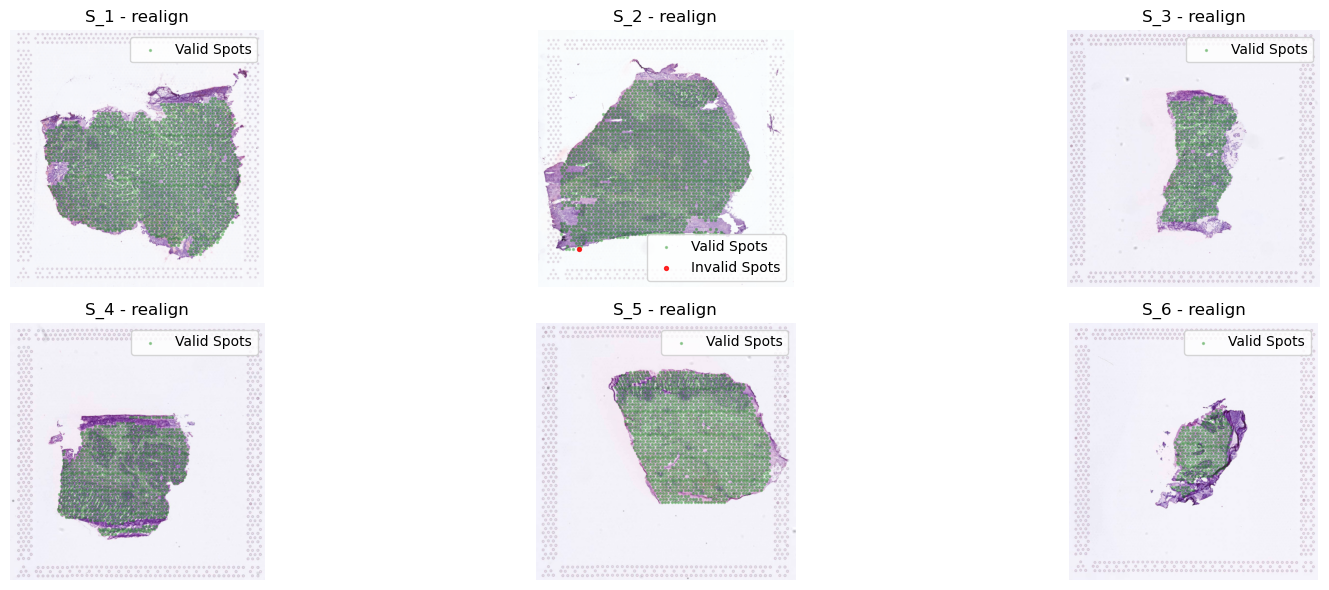

✅ 所有資料已儲存為 filteredd.h5，結構與原始檔完全一致 ✅


In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

samples = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6']
invalid_spots_raw = {}
valid_spots_dict = {}

with h5py.File("dataset/elucidata_ai_challenge_data.h5", "r") as masked_h5, \
     h5py.File("dataset/try2.h5", "r") as spot_h5:
    fig, axs = plt.subplots(2, 3, figsize=(18, 6))
    axs = axs.flatten()
    for i, sample in enumerate(samples):
        image = np.array(masked_h5[f"images/Train/{sample}"])
        spots = np.array(spot_h5[f"spots/Train/{sample}"])
        x_coords, y_coords = spots["x"], spots["y"]

        invalid = detect_invalid_spots_and_plot(image, x_coords, y_coords, ax=axs[i], title=f"{sample} - realign", tile_size=26)
        invalid_spots_raw[sample] = invalid
        valid_mask = np.ones(len(spots), dtype=bool)
        for idx, _, _ in invalid:
            valid_mask[idx] = False

        valid_spots = spots[valid_mask]
        print(f"Valid points save: {len(valid_spots)}, Raw point: {len(x_coords)}")
        valid_spots_dict[sample] = valid_spots

    plt.tight_layout()
    plt.show()

# 2️⃣ 儲存整個新資料集（完整格式）
with h5py.File("./dataset/try_realign.h5", "w") as out_h5, \
     h5py.File("dataset/try1_masked.h5", "r") as in_image_h5:

    # ✅ 建立完整資料結構
    grp_images = out_h5.create_group("images/Train")
    grp_spots = out_h5.create_group("spots/Train")

    for sample in samples:
        # 直接複製影像（原圖）
        image = in_image_h5[f"images/Train/{sample}"]
        grp_images.create_dataset(sample, data=image, compression="gzip")

        # 存新的 spots（只保留 valid 的）
        valid_spots = valid_spots_dict[sample]
        grp_spots.create_dataset(sample, data=valid_spots, compression="gzip")

print("✅ 所有資料已儲存為 filteredd.h5，結構與原始檔完全一致 ✅")


# Test data

🚫 Found 0 invalid spots (outside tissue) in slide S_7


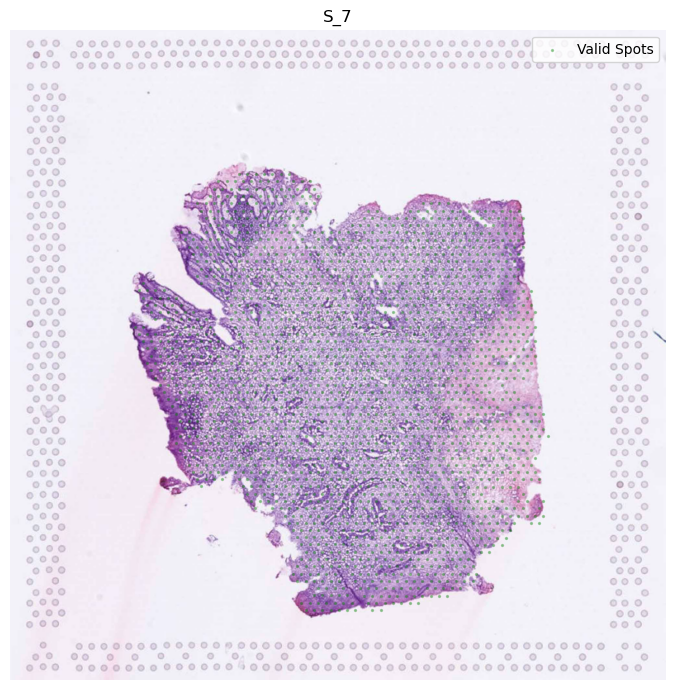

In [13]:

    
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
# ====== 載入資料：只做 S_1 ======
sample = 'S_7'

with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    image = (h5file["images/Test"])
    spots = (h5file["spots/Test"])
    image = np.array(image[sample])
    spots = np.array(spots[sample])
    x, y = spots["x"], spots["y"]

invalid_spots = detect_invalid_spots_and_plot(image, x, y, tile_size=26, title=sample)
plt.tight_layout()
plt.show()